In [3]:
import math
from matplotlib import pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = 12,8

In [4]:
def d2r(d) :
    return d / 180.0 * math.pi


def r2d(r) :
    return r / math.pi * 180.0


def d2s(d) :
    mi = round(d * 60)
    h = int(mi / 60)
    m = int(mi % 60)
    return "{:02d}:{:02d}".format(h, m)



In [6]:
dm = [31, 29, 31,  30, 31, 30,  31, 31, 30,  31, 30, 31]
lat = d2r(31.963)
d0 = 10+0.5 # day no to Winter Solstice
dd = 0
mjd=7387
res = []
for m in range(0, 12) :
    for d in range(0, dm[m]) :
        dd += 1
        mjd += 1
        dpos = ((dd+d0) / 365.24) * 2 * math.pi
        sdec = d2r(-23.5) * math.cos(dpos)
        sunris = math.acos(math.tan(lat) * math.tan(sdec)) / math.pi * 12
        sunset = 24 - sunris
        nightlen = 24 + sunris - sunset
        obsbegin = sunset + 1
        obsend = sunris - 1
        obslen = 24 + obsend - obsbegin
        
        res.append([mjd, dpos, sdec, sunris, sunset, nightlen, obsbegin, obsend, obslen])


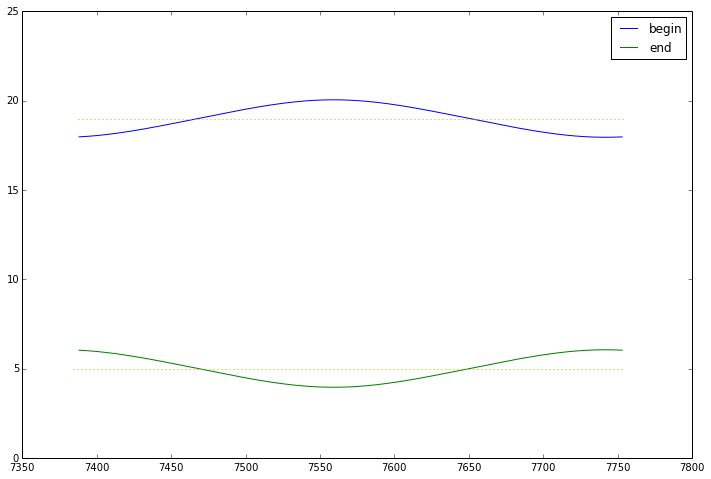

In [12]:
plt.plot([r[0] for r in res], [r[6] for r in res], label='begin')
plt.plot([r[0] for r in res], [r[7] for r in res], label='end')
plt.plot([7387,7755], [19,19], "y:")
plt.plot([7384,7755], [5,5], "y:")
plt.legend()

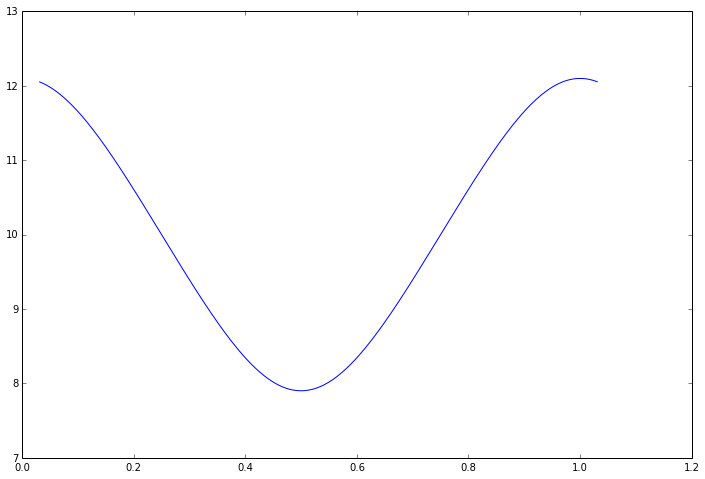

In [15]:
plt.plot([r[1]/2/math.pi for r in res], [r[8] for r in res], label='obs_hours')